In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline 

In [4]:
x,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [5]:
x

array([[-7.28900403, -3.69136708],
       [-1.82270062, -8.75099853],
       [ 1.55899552, -6.7830217 ],
       ...,
       [-7.07507189, -1.3672041 ],
       [-8.92383388, -4.26153346],
       [-1.53806787, -8.3499829 ]], shape=(1000, 2))

In [6]:
y

array([1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1,
       2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1,

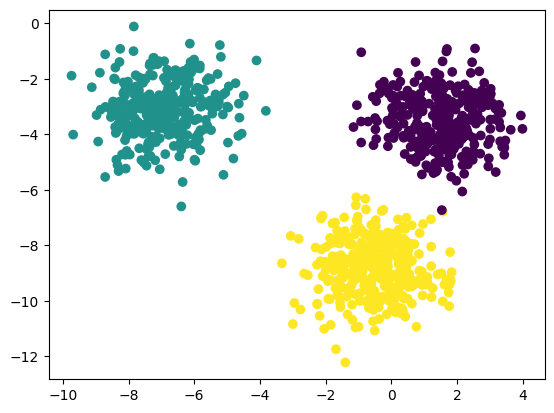

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [13]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[1339.999999999999,
 579.211238444977,
 135.45812530027382,
 118.28147485045838,
 99.36045215628226,
 90.23042305330608,
 73.51688442212831,
 67.06547935136659,
 59.332697530825364,
 53.60539355185438]

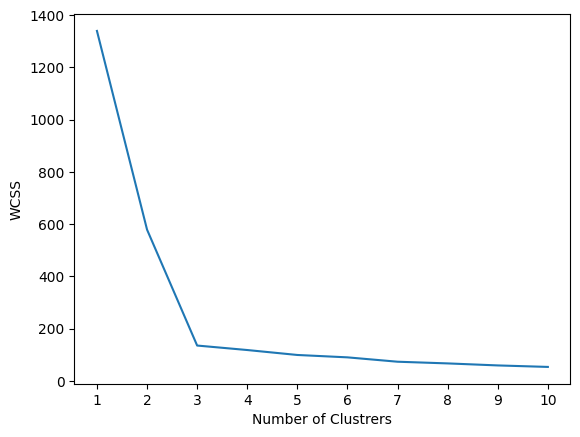

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [20]:
kmeans.fit_predict(x_train_scaled)

array([1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2,
       1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1,

In [21]:
y_pred=kmeans.predict(x_test_scaled)

In [22]:
y_pred

array([0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1,
       1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0,
       0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0,

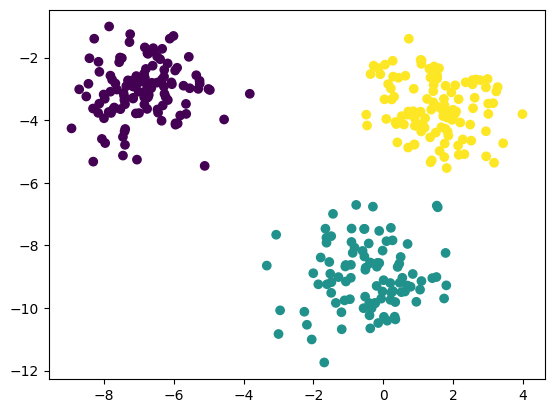

In [24]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [25]:
from kneed import KneeLocator

In [26]:
k1 = KneeLocator(range(1,11),wcss,curve="convex", direction="decreasing")

In [27]:
k1.elbow

np.int64(3)

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[0.5731938528272096,
 0.722863398795987,
 0.5786476784595841,
 0.47638862531767995,
 0.35981241108316203,
 0.3384347493854648,
 0.346599415941013,
 0.3454617922526295,
 0.3370293629473177]

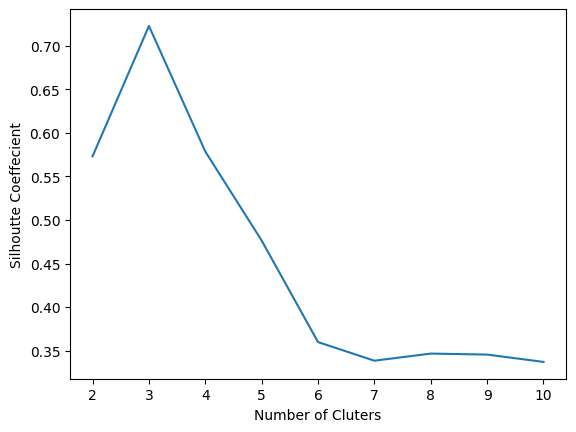

In [31]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()